<a href="https://colab.research.google.com/github/fogg-lab/tissue-model-analysis-tools/blob/main/notebooks/analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tissue Model Analysis Tools Demo

## Description
Runs `fl_tissue_model_analysis_tools` on example data from the [tissue-model-analysis-tools-data](https://github.com/fogg-lab/tissue-model-analysis-tools-data) repository.

## Instructions

### 1) Use a GPU runtime
Change the Colab runtime type to use GPU acceleration, so that the invasion depth and microvessel analysis scripts run faster.
> In the toolbar, go to Runtime -> Change runtime type. Under "Hardware accelerator", select "GPU" and choose a GPU type (any option works).

### 2) Run the setup section

Run the setup cells to set up the Conda environment and the fl_tissue_model_tools package in the Colab runtime. Installing the condacolab package will restart the runtime, and you might get a warning that says "Your session crashed for an unknown reason." You can safely ignore that message.

### 3) Run the demo

We run each analysis using the scripts from the [fl_tissue_model_tools](https://github.com/fogg-lab/tissue-model-analysis-tools) package, via the command line utility (`tmat`) that is installed alongside the package. In this notebook, these commands are prefixed with an exclamation mark (`!tmat ...`). The equivalent command to run in a regular terminal is the same, but without the `!`.

After running the setup cells, you can customize the scripts and their configurations by modifying the files stored in tmat's base directory: /content/fl_tissue_model_tools.

Alternatively, you can run these analyses on your own data. For best results on invasion depth and microvessel formation analysis, you will need to train your own models. To train the invasion depth classifier and the microvessel segmentation model (on a CUDA-capable system), refer to the [training notebooks](https://github.com/fogg-lab/tissue-model-analysis-tools/tree/main/notebooks) in the GitHub repository.

## Setup

### 1. Install any missing packages in the runtime

In [1]:
!pip install albumentations
!pip install boost
!pip install dask
!pip install gudhi
!pip install jupyterlab
!pip install matplotlib
!pip install networkx
!pip install opencv-python
!pip install scikit-learn
!pip install scipy
!pip install setuptools
!pip install tensorflow
!pip install keras-tuner
!pip install pillow
!pip install scikit-image
!pip install tqdm
!pip install imagecodecs
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.7 MB/s eta 0:00:00


In [2]:
# Install the fl_tissue_model_tools (tmat) package
!pip install -I fl_tissue_model_tools@git+https://github.com/fogg-lab/tissue-model-analysis-tools.git#subdirectory=src

  Cloning https://github.com/fogg-lab/tissue-model-analysis-tools.git to /tmp/pip-install-hzfwv6j9/fl-tissue-model-tools_db427dc5a62c4814b63fc215f8f107d0
  Running command git clone --filter=blob:none --quiet https://github.com/fogg-lab/tissue-model-analysis-tools.git /tmp/pip-install-hzfwv6j9/fl-tissue-model-tools_db427dc5a62c4814b63fc215f8f107d0
  Resolved https://github.com/fogg-lab/tissue-model-analysis-tools.git to commit 6fa12c44f7355efcaa48e4639a3cf4a2d8e94ea9
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for fl_tissue_model_tools: filename=fl_tissue_model_tools-0.1.0-cp310-cp310-linux_x86_64.whl size=190205337 sha256=a0b48b110e82334f47ce80c596d1817a4fb82e863551bee943aa4f8a2cbace77
  Stored in directory: /tmp/pip-ephem-wheel-cache-5und6yvs/wheels/ac/da/2d/3382db7c1adb1ecc35fd756818bd79cd34c0cd62d2956ad5e6
Successfully built fl_tissue_model_tools


In [3]:
# Configure package home directory
!tmat configure /content/fl_tissue_model_tools

# also remove colab's "sample_data" folder (it is distracting)
!rm -rf /content/sample_data 2> /dev/null || true

Base directory already exists: /content/fl_tissue_model_tools
Overwrite config directory? [y/n]: y
Creating config directory...
Overwrite scripts directory? [y/n]: y
Creating scripts directory...
Overwrite model_training directory? [y/n]: y
Creating model_training directory...

The base directory for fl_tissue_model_tools is now: /content/fl_tissue_model_tools


### 3. Download example input data
**~2 minutes**

In [4]:
!git clone https://github.com/fogg-lab/tissue-model-analysis-tools-data.git

Cloning into 'tissue-model-analysis-tools-data'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 256
Receiving objects: 100% (259/259), 1.28 GiB | 30.67 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (250/250), done.


## Print `tmat` package usage with the `--help` (`-h`) flag

In [4]:
!tmat -h

Usage: tissue-model-analysis-tools [SUBCOMMAND] [OPTIONS]
Shorthand: tmat [SUBCOMMAND] [OPTIONS]

If no subcommand is given, the interactive mode will be used. For example, run: tmat

Available subcommands:
    configure: Set the location of the base directory for scripts and model training data.
    update: Update the package from GitHub.
    [SCRIPT_NAME]: Run a script from the scripts directory. Do not include the .py extension.

Get available options:
    -h, --help: Show this help message and exit.
    [SUBCOMMAND] -h: Show help (including available options) for a particular subcommand.

Examples:
    tmat configure -h
    tmat configure "C:\Users\Quinn\Desktop\some_folder_name"
    tmat update
    tmat compute_inv_depth -h
    tmat compute_zproj -v "C:\Users\Quinn\input_folder_name" "C:\Users\Quinn\out_folder_name"



## Z Projection

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_zproj.py

**Input images:** /content/tissue-model-analysis-tools-data/zprojection_input

In [5]:
# Run the Z projection utility
!tmat compute_zproj --verbose /content/tissue-model-analysis-tools-data/zprojection_input /content/zproj_demo_out

Executing: /usr/local/bin/python3.10 /content/fl_tissue_model_tools/scripts/compute_zproj.py --verbose /content/tissue-model-analysis-tools-data/zprojection_input /content/zproj_demo_out
2024-01-23 07:29:08.511571: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 07:29:08.511630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 07:29:08.513622: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
['--verbose', '/content/tissue-model-analysis-tools-data/zprojection_input', '/content/zproj_demo_out']

[Verifying Input Directory]==============================================

### Output
Stored in /content/zproj_demo_out

Show the projections side-by-side:

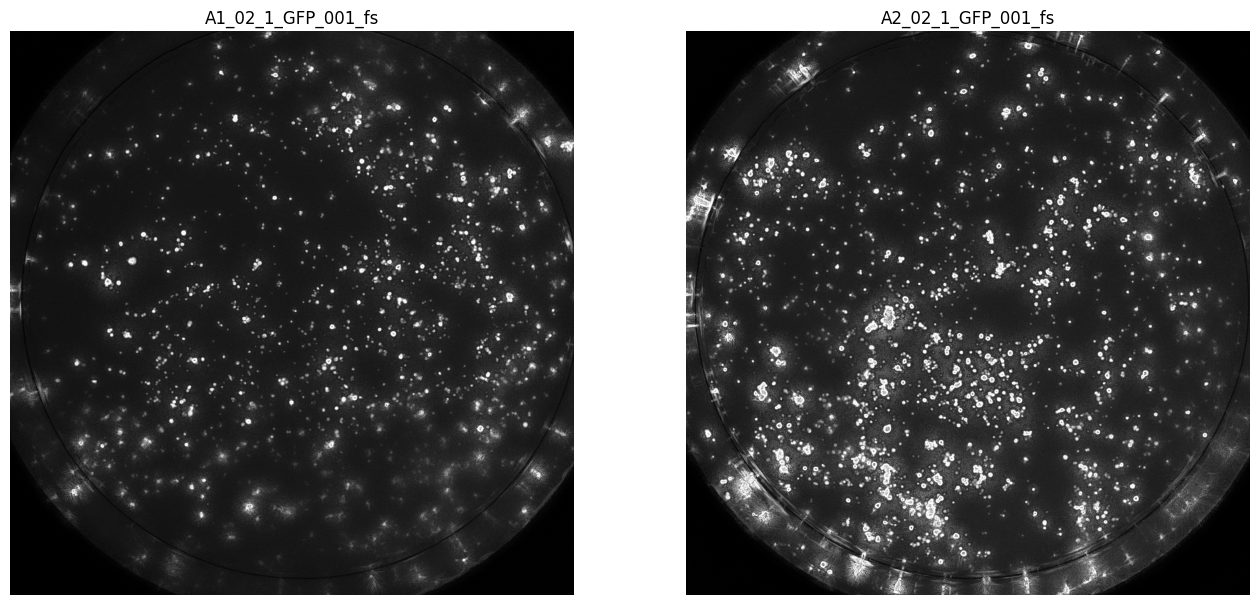

In [6]:
from matplotlib import pyplot as plt
from skimage import io
from glob import glob
import os

zprojection_paths = glob('/content/zproj_demo_out/*.tif')
zprojections = [io.imread(zp) for zp in zprojection_paths]

plt.figure(figsize=(16, 16))

for index, (zprojection, zp_path) in enumerate(zip(zprojections, zprojection_paths), start=1):
    plt.subplot(1, len(zprojections), index)
    plt.imshow(zprojection, cmap='gray')
    plt.axis('off')

    image_name = os.path.splitext(os.path.basename(zp_path))[0]
    plt.title(image_name)

plt.show()

## Cell Coverage Area Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_cell_area.py

**Configuration:** /content/fl_tissue_model_tools/config/default_cell_area_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/zprojection_input

In [7]:
# Run the cell area script
!tmat compute_cell_area --verbose /content/tissue-model-analysis-tools-data/cell_coverage_area_input /content/cellarea_demo_out

Executing: /usr/local/bin/python3.10 /content/fl_tissue_model_tools/scripts/compute_cell_area.py --verbose /content/tissue-model-analysis-tools-data/cell_coverage_area_input /content/cellarea_demo_out
/content/fl_tissue_model_tools/scripts/compute_cell_area.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-01-23 07:29:30.542613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 07:29:30.542681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.c

### Output

Stored in /content/cellarea_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

In [8]:
!cat /content/cellarea_demo_out/calculations/cell_area.csv | perl -pe 's/((?<=,)|(?<=^)),/ ,/g;' | column -t -s,

image_id             area_pct
C6_-1_1_1_ZProj_004  7.068120974058617
C6_-1_1_1_ZProj_007  5.715629251034243
B8_-1_1_1_ZProj_004  8.628713326588798
B8_-1_1_1_ZProj_001  10.607446039916915
B7_-1_1_1_ZProj_004  9.459648468460067
C8_-1_1_1_ZProj_010  4.096216453605492
C7_-1_1_1_ZProj_010  5.311223535943528
B7_-1_1_1_ZProj_001  10.743904087979447
C1_-2_1_1_ZProj_010  6.659470136313003
B6_-1_1_1_ZProj_010  3.5893255722351087
C8_-1_1_1_ZProj_001  8.853507966482448
D1_-2_1_1_ZProj_003  9.3761250450018
C4_-2_1_1_ZProj_007  10.416904047501488
C1_-2_1_1_ZProj_004  7.786359901396878
C4_-2_1_1_ZProj_001  11.572049771739
C7_-1_1_1_ZProj_004  7.163199990904595
C6_-1_1_1_ZProj_001  9.318495514147688
C3_-2_1_1_ZProj_004  7.92363729545704
B7_-1_1_1_ZProj_007  6.896262276210234
C1_-2_1_1_ZProj_001  11.213672910209766
D2_-2_1_1_ZProj_004  9.32984503924331
D2_-2_1_1_ZProj_010  4.366421672720732
C5_-1_1_1_ZProj_007  5.590484282073067
C2_-2_1_1_ZProj_010  11.543032394096224
D3_-2_1_1_ZProj_007  4.62443932656

## Invasion Depth Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_inv_depth.py

**Configuration:** /content/fl_tissue_model_tools/config/default_invasion_depth_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/invasion_depth_input

**Trained model data:** /content/fl_tissue_model_tools/model_training/best_ensemble

In [9]:
# Run the invasion depth script
!tmat compute_inv_depth --verbose /content/tissue-model-analysis-tools-data/invasion_depth_input /content/invasion_demo_out

Executing: /usr/local/bin/python3.10 /content/fl_tissue_model_tools/scripts/compute_inv_depth.py --verbose /content/tissue-model-analysis-tools-data/invasion_depth_input /content/invasion_demo_out
/content/fl_tissue_model_tools/scripts/compute_inv_depth.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-01-23 07:30:08.336148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 07:30:08.336214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:6

### Output

Full output is stored in /content/invasion_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

In [10]:
!cat /content/invasion_demo_out/invasion_depth_predictions.csv | perl -pe 's/((?<=,)|(?<=^)),/ ,/g;' | column -t -s,

img_name                        inv_prob      inv_label
C1_02_2_1Z13_Texas Red_001.tif  0.0042568673  0
C1_02_2_1Z12_Texas Red_001.tif  0.0041463957  0
C1_02_2_1Z11_Texas Red_001.tif  0.0033662524  0
C1_02_2_1Z10_Texas Red_001.tif  0.0025427027  0
C1_02_2_1Z9_Texas Red_001.tif   0.0017179479  0
C1_02_2_1Z8_Texas Red_001.tif   0.0011226508  0
C1_02_2_1Z7_Texas Red_001.tif   0.0007264865  0
C1_02_2_1Z6_Texas Red_001.tif   0.0008041966  0
C1_02_2_1Z5_Texas Red_001.tif   0.0015115485  0
C1_02_2_1Z4_Texas Red_001.tif   0.028937483   0
C1_02_2_1Z3_Texas Red_001.tif   0.90273434    1
C1_02_2_1Z2_Texas Red_001.tif   0.999397      1
C1_02_2_1Z1_Texas Red_001.tif   0.99889183    1
C1_02_2_1Z0_Texas Red_001.tif   0.78109497    1


## Microvessel Formation Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_branches.py

**Configuration:** /content/fl_tissue_model_tools/config/default_branching_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/branching_input

**Trained model data:** /content/fl_tissue_model_tools/model_training/binary_segmentation

In [11]:
# Copy `n` images from the full set of demo input images into a smaller directory to run the analysis on
n = 10
!cd /content/tissue-model-analysis-tools-data/branching_input && mkdir -p input_set && find . -maxdepth 1 -type f -iname "*.tif" | head -${n} | xargs -I '{}' cp '{}' input_set/

# Run the branching script with the --save-graphics (-g) flag to save visualizations.
!tmat compute_branches --verbose -g /content/tissue-model-analysis-tools-data/branching_input/input_set /content/branching_demo_out
# Alternatively, you can use the --save-intermediates flag (-i) to also save intermediate visualizations
# !tmat compute_branches --verbose -i /content/...

Executing: /usr/local/bin/python3.10 /content/fl_tissue_model_tools/scripts/compute_branches.py --verbose -g /content/tissue-model-analysis-tools-data/branching_input/input_set /content/branching_demo_out
2024-01-23 07:30:32.553132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 07:30:32.553177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 07:30:32.554481: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

Analyzing C4_011...
Applying mask to image...

Segmenting image...
2/2 [==============================] - 0s 362ms/step
100% 8/8 [00:40<00:00,  5.01s/it]

Comp

### Output

Stored in /content/branching_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

#### 1. Show the .csv output

In [12]:
import pandas as pd

csv_path = '/content/branching_demo_out/branching_analysis.csv'
df = pd.read_csv(csv_path, encoding='utf-16')
print(df.to_string(index=False))

 Image  Total # of branches  Total branch length (µm)  Average branch length (µm)
C4_011                   26               1416.576108                   54.483696
E7_001                    0                  0.000000                    0.000000
D7_005                    3                 66.055065                   22.018355
C3_006                   23                982.546974                   42.719434
A3_017                    0                  0.000000                    0.000000
A3_001                  258              19745.859798                   76.534340
C1_001                   86               4545.867445                   52.858924
C4_006                   37               1309.443738                   35.390371
C3_001                   32               1552.269166                   48.508411
B4_006                   32               1369.033353                   42.782292


#### 2. Show visualizations for 5 random images

*Samples with no branches are skipped.*

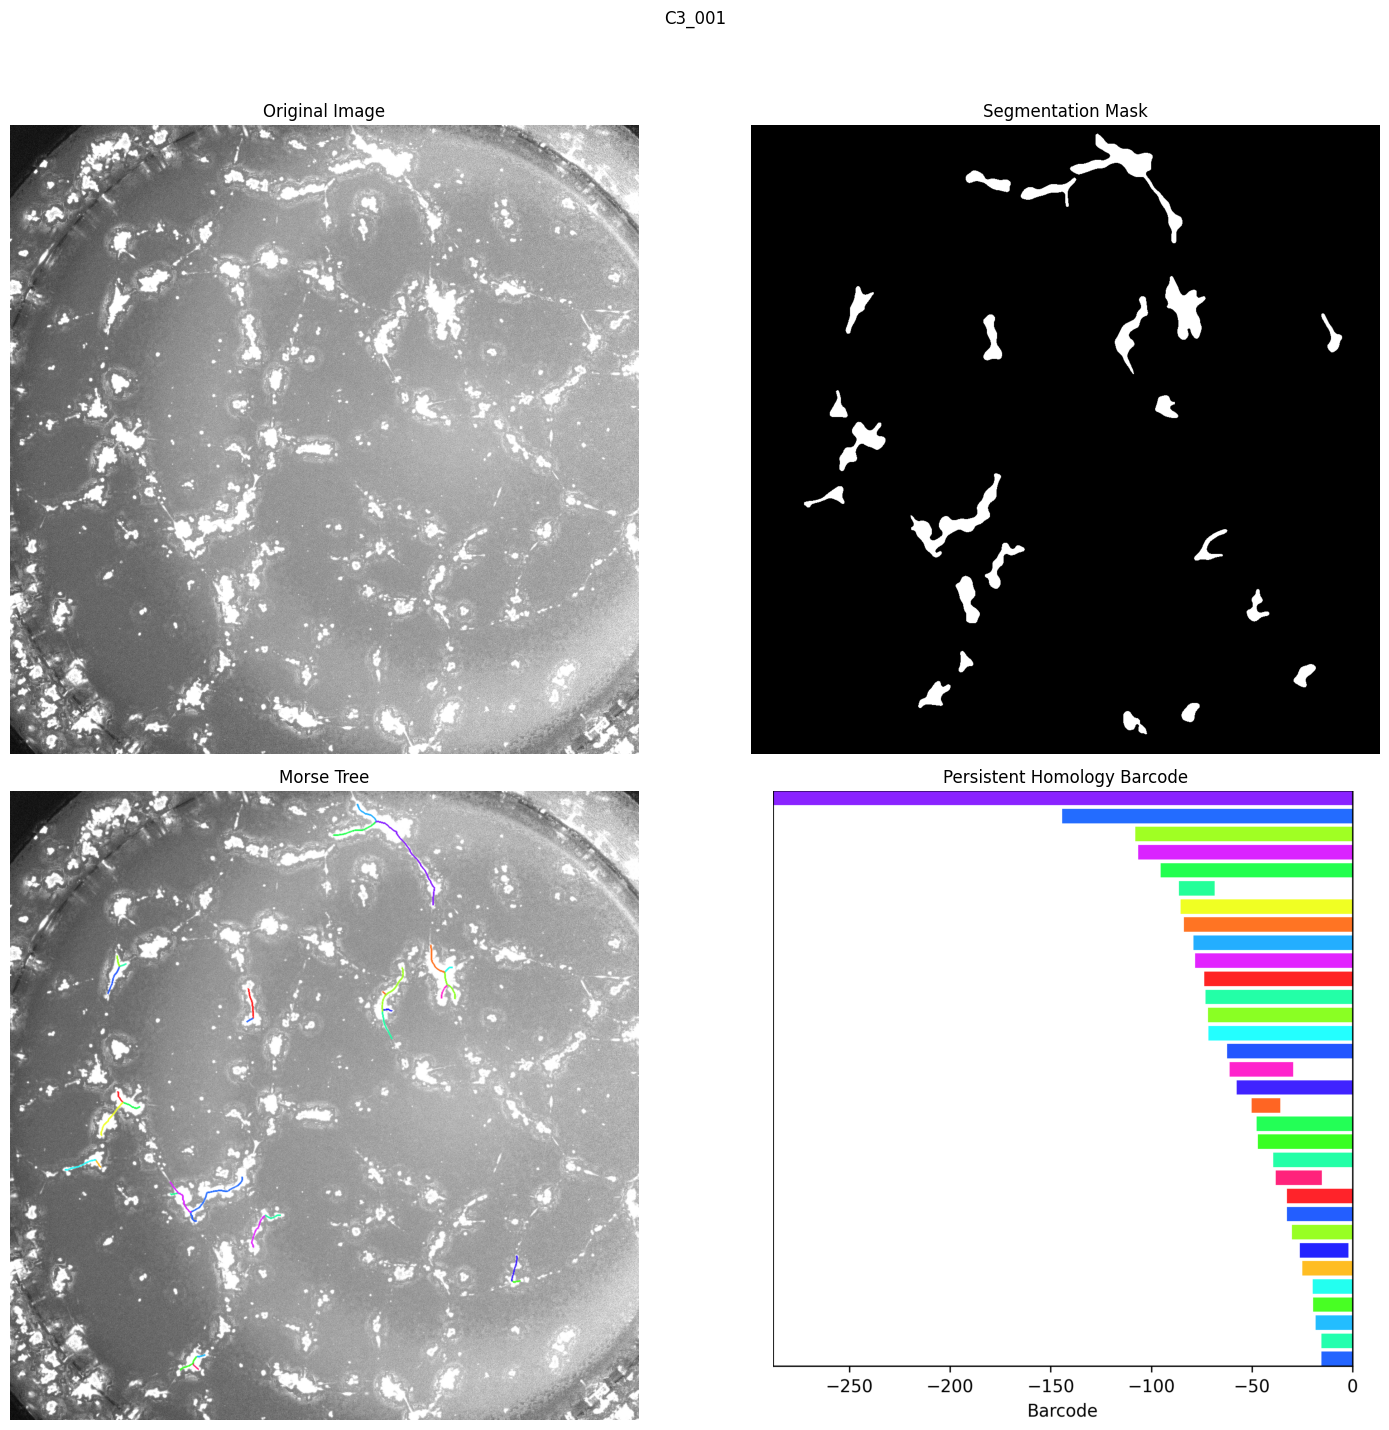

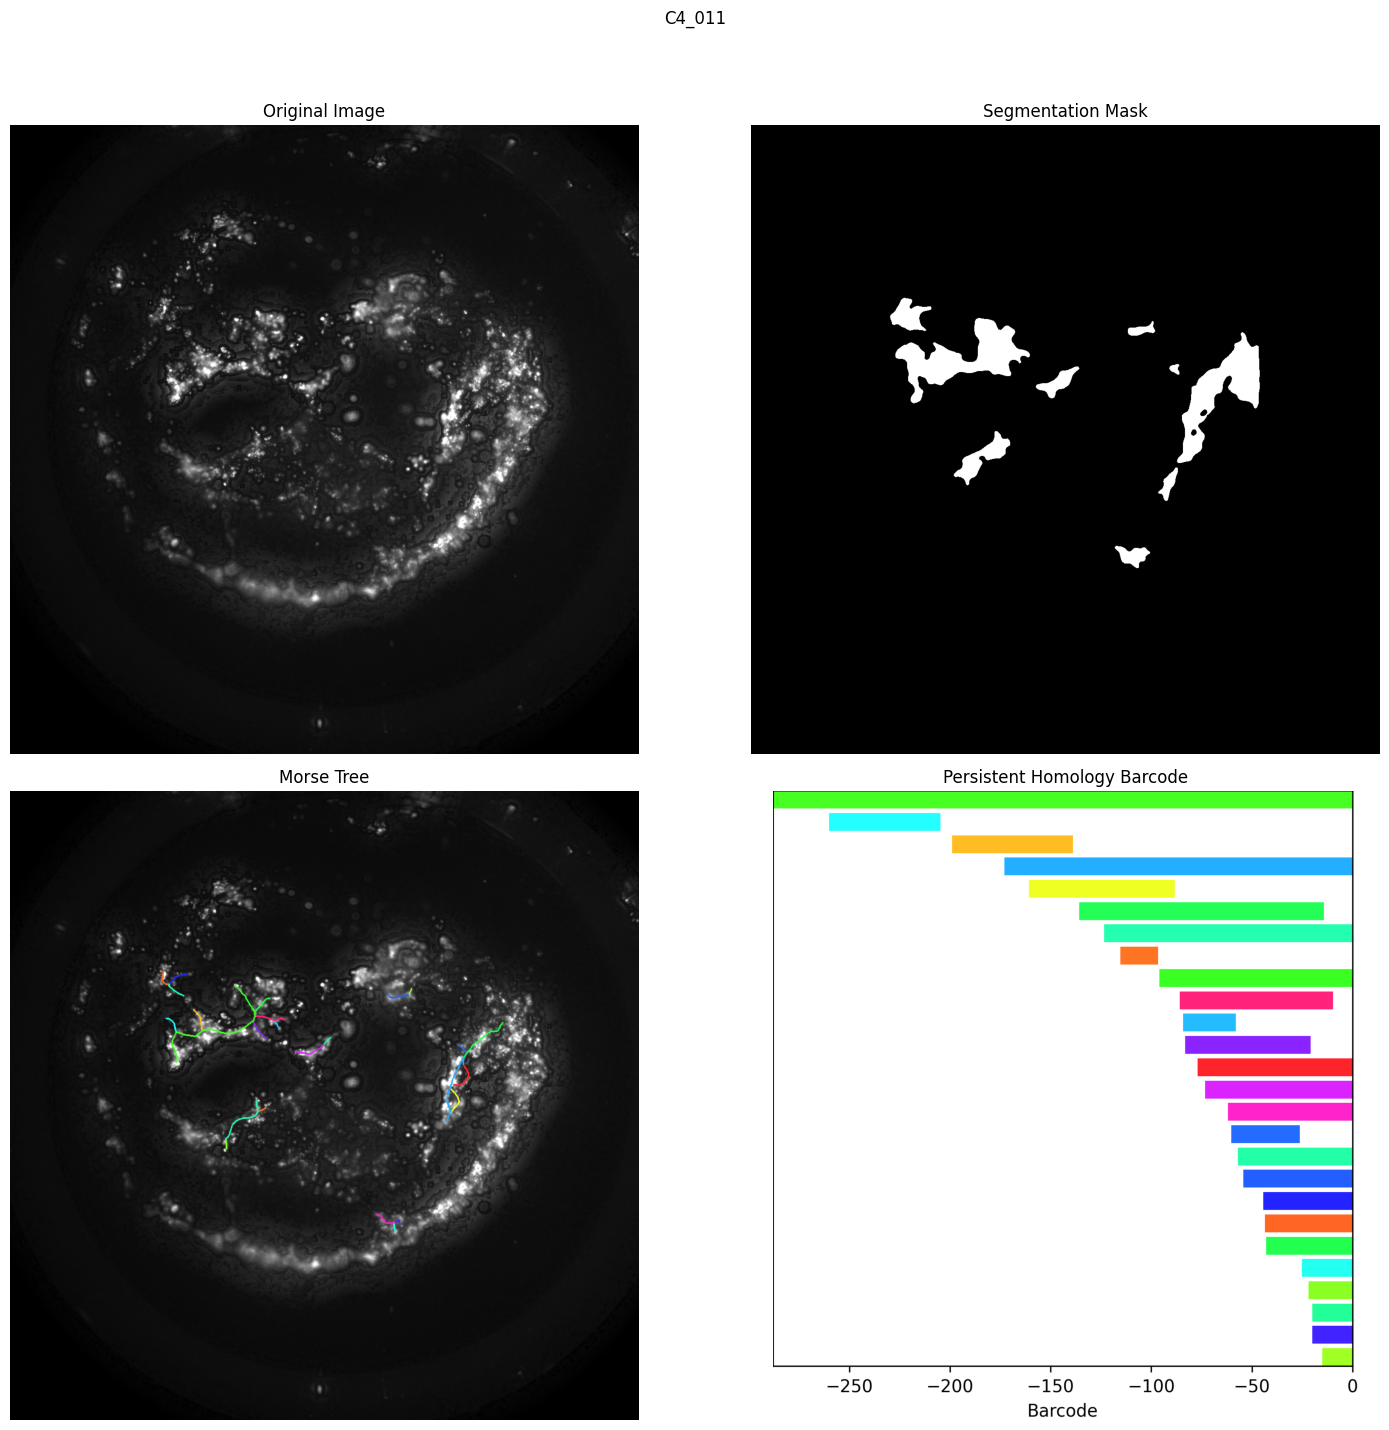

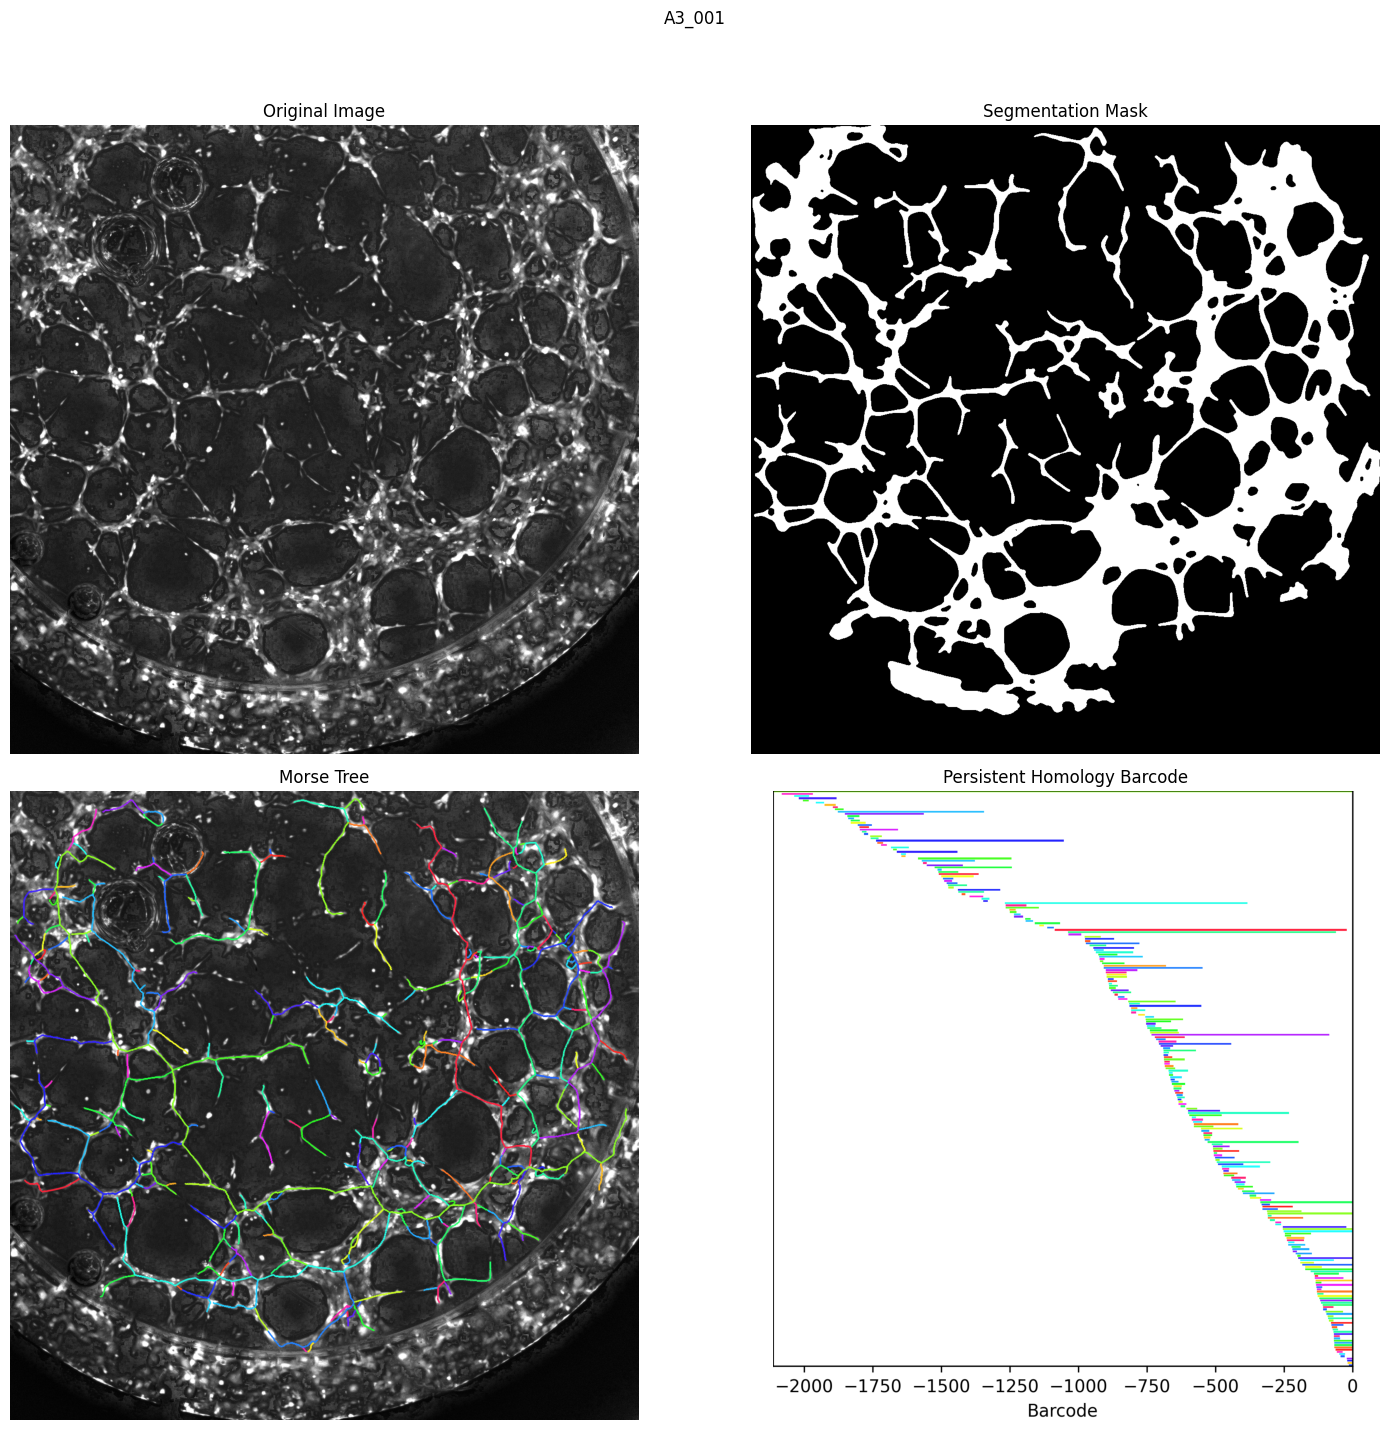

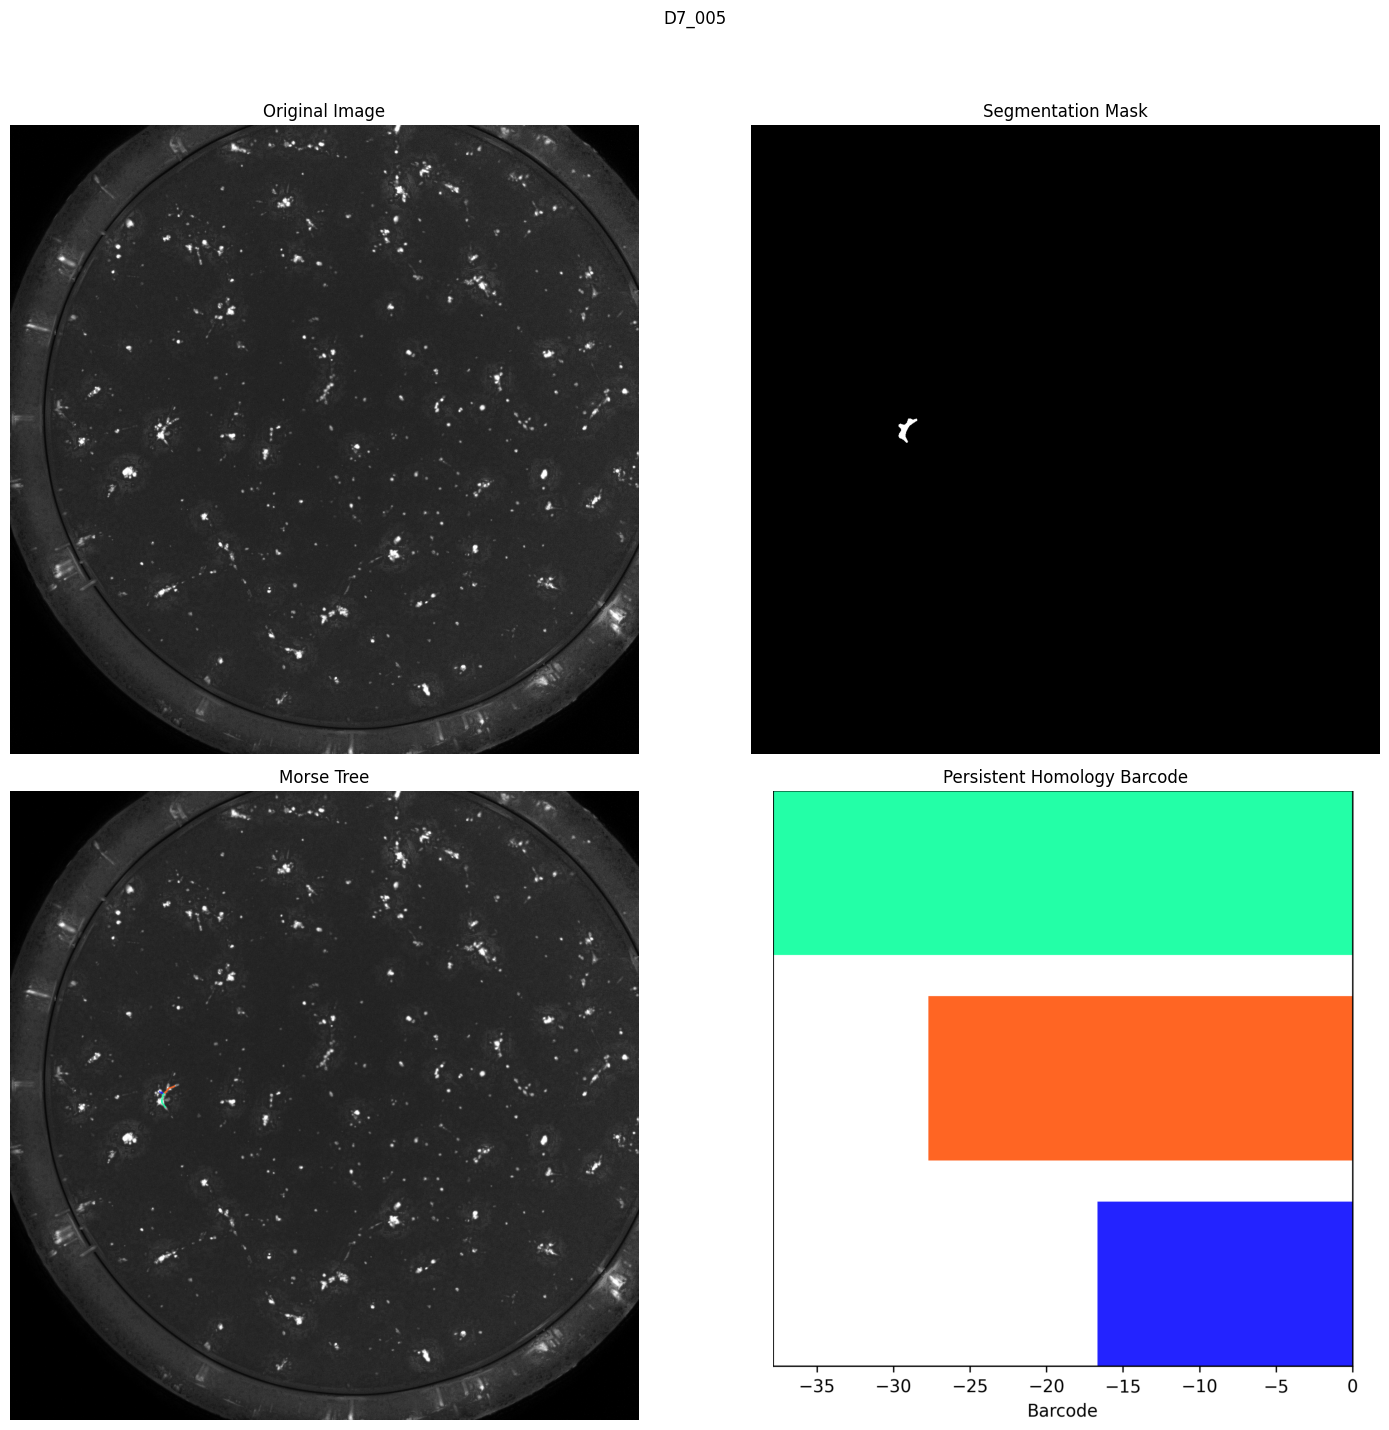

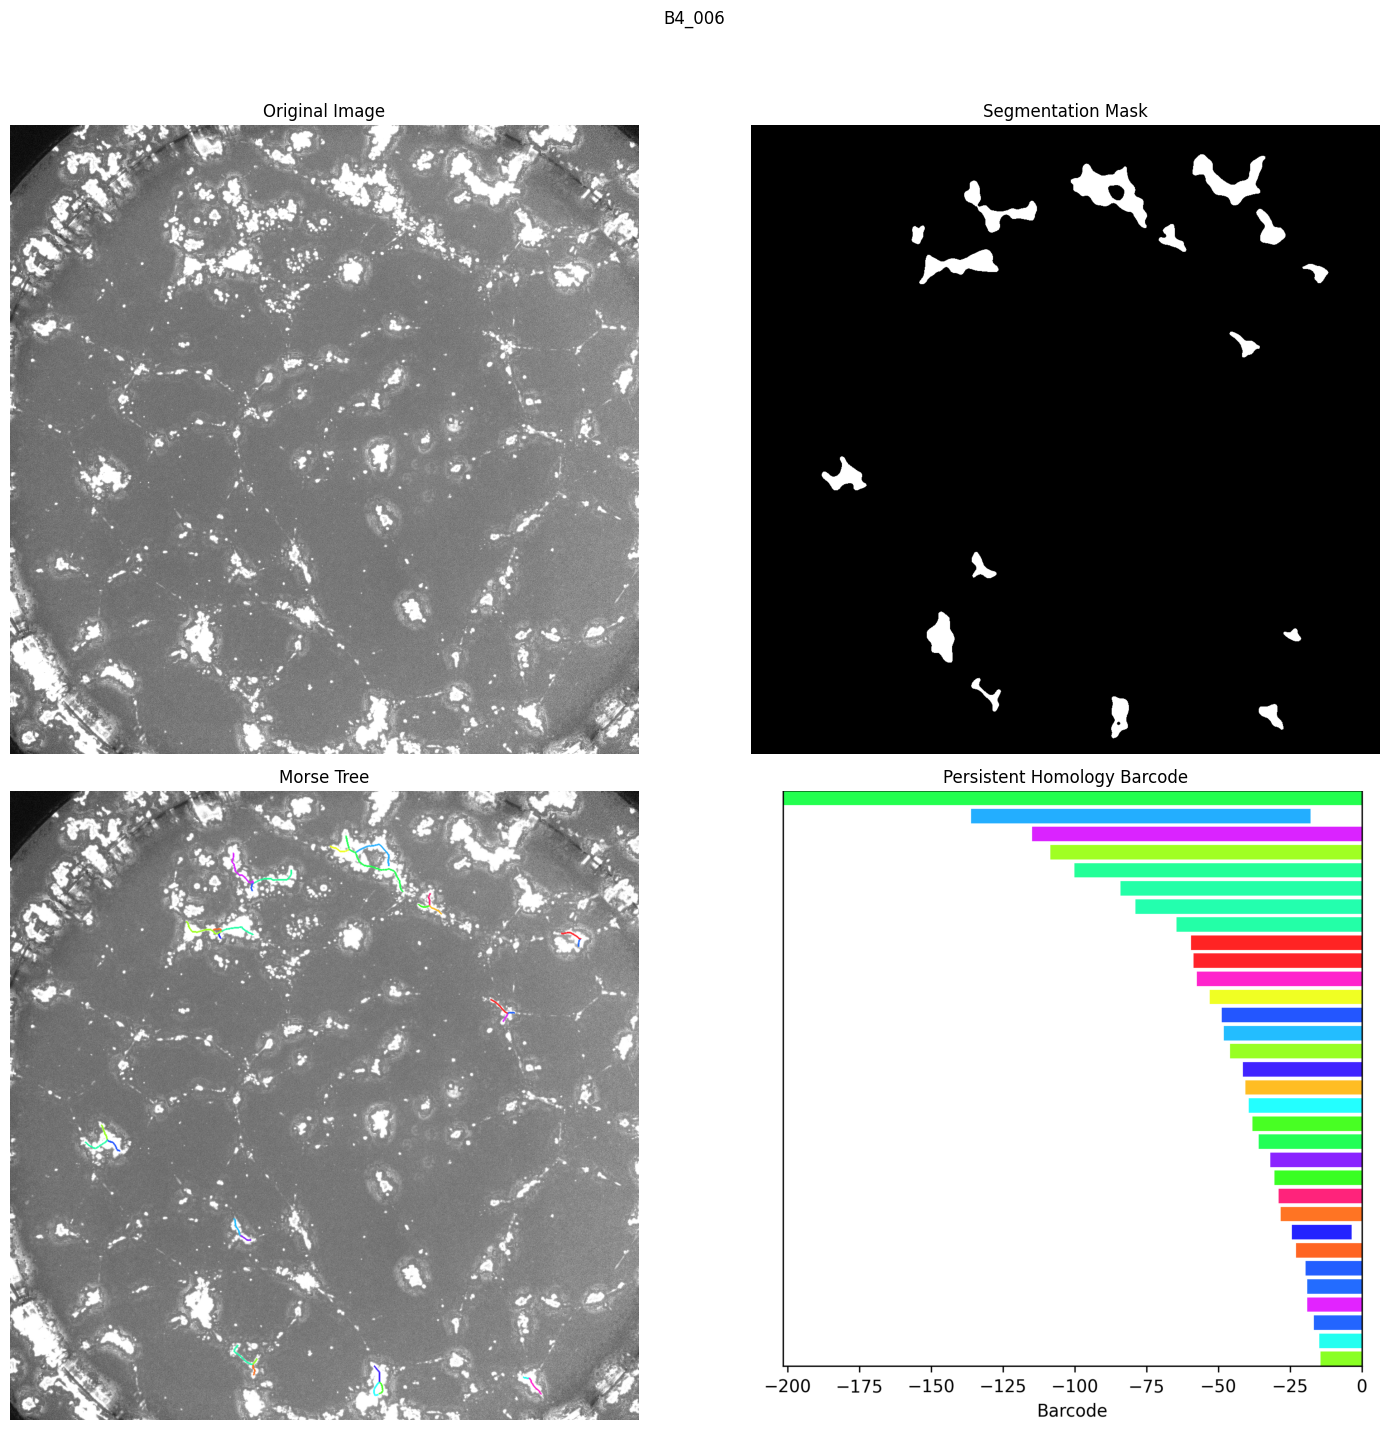

In [13]:
import os
import random
import pandas as pd
from glob import glob
from skimage import io
from matplotlib import pyplot as plt

# Show visualizations for 5 randomly sampled images. Samples with no branches are skipped

vis_dir = "/content/branching_demo_out/visualizations"
csv_path = "/content/branching_demo_out/branching_analysis.csv"

df = pd.read_csv(csv_path, encoding='utf-16')
filtered_df = df[df['Total # of branches'] > 0]

subdirs = [os.path.join(vis_dir, d) for d in filtered_df['Image'] if os.path.isdir(os.path.join(vis_dir, d))]
selected_subdirs = random.sample(subdirs, 5)

vis_filenames = ["original_image.png", "segmentation_mask.png", "morse_tree.png", "barcode.png"]
subplot_titles = ["Original Image", "Segmentation Mask", "Morse Tree", "Persistent Homology Barcode"]

for subdir in selected_subdirs:
    plt.figure(figsize=(15, 15))
    plt.suptitle(os.path.basename(subdir))

    for index, file_name in enumerate(vis_filenames, start=1):
        file_path = os.path.join(subdir, file_name)
        image = io.imread(file_path)

        plt.subplot(2, 2, index)
        plt.imshow(image, cmap='gray' if index != 4 else 'jet')
        plt.title(subplot_titles[index-1])
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()